# Exploratory Dataset Analysis

Performs exploratory analysis on audio dataset metadata, focusing on style distributions and tempo (BPM).

## Tasks
1. Analyze single-file style probabilities.
2. Compute global style distributions across the dataset, using:
   - Top-k style probabilities.
   - BPM distribution.
3. Compute global style distributions across the dataset, using the full 400-style tensor per file:
   - Calculate median and mean style probabilities.
   - Apply PCA for dimensionality reduction and visualization.

## Dependencies
- Python 3.10+
- json, glob, collections
- numpy
- matplotlib
- torch
- scikit-learn

## Usage
- Run all cells sequentially.
- Ensure dataset metadata files (JSON/tensor) are available in the working directory.
- Adjust file paths or number of styles (`top-k`, full tensor size) to match new datasets.


## Task 1: Analyze single-file style probabilities.

Sorted Genres by Probability:

Electronic---Electro House: 0.4039
Rock---Sludge Metal: 0.3014
Rock---Black Metal: 0.2756
Electronic---Hands Up: 0.2715
Rock---Avantgarde: 0.2626

Aggregated by Main Genre:

Rock: 0.8397
Electronic: 0.6754


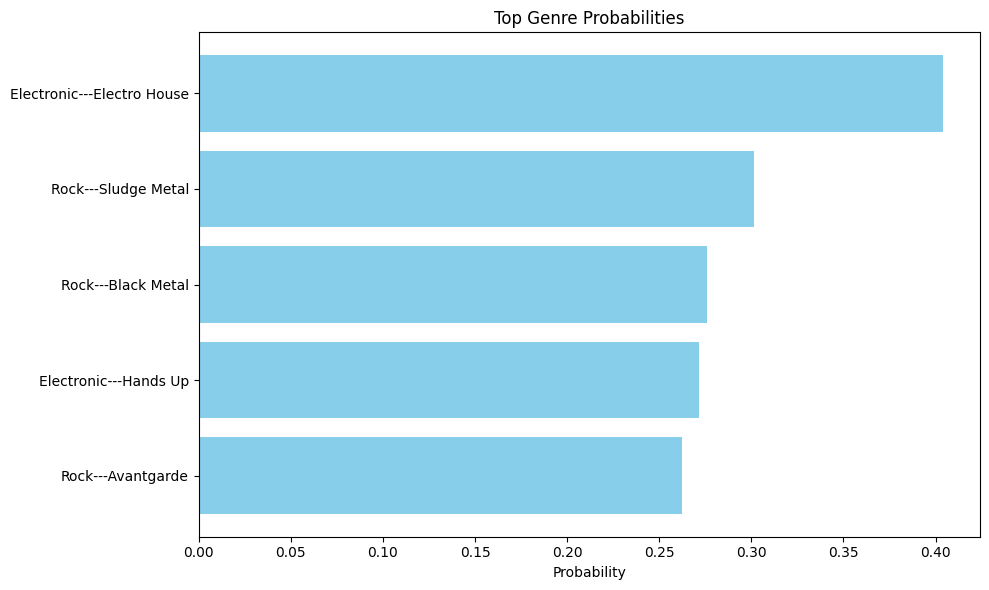

In [10]:
import json
from collections import defaultdict
import matplotlib.pyplot as plt

# Path to your JSON file
file_path = "../output_preprocess_mix_DAC7000/labels/659586_labels.json"

# Load the JSON data
with open(file_path, "r") as file:
    data = json.load(file)

# Extract the genre-probability dictionary
top_probs = data.get("top_probs_dict", {})

# Sort by probability (descending)
sorted_genres = sorted(top_probs.items(), key=lambda x: x[1], reverse=True)

# Print sorted genres
print("Sorted Genres by Probability:\n")
for genre, prob in sorted_genres:
    print(f"{genre}: {prob:.4f}")

# Aggregate by main genre
main_genre_totals = defaultdict(float)
for genre, prob in top_probs.items():
    main_genre = genre.split("---")[0]
    main_genre_totals[main_genre] += prob

print("\nAggregated by Main Genre:\n")
for main_genre, total_prob in sorted(main_genre_totals.items(), key=lambda x: x[1], reverse=True):
    print(f"{main_genre}: {total_prob:.4f}")

# Optional: Plot the genre probabilities
def plot_genre_probs(sorted_genres):
    genres = [g for g, _ in sorted_genres]
    probs = [p for _, p in sorted_genres]

    plt.figure(figsize=(10, 6))
    plt.barh(genres[::-1], probs[::-1], color='skyblue')
    plt.xlabel("Probability")
    plt.title("Top Genre Probabilities")
    plt.tight_layout()
    plt.show()

# Uncomment this to show the plot
plot_genre_probs(sorted_genres)


## Task 2: Compute the top 5 styles per file and BPM distribution across the dataset


Average Genre Probabilities Across All Files:

Rock---Goregrind: 0.3412
Rock---Noisecore: 0.3246
Electronic---Musique Concrète: 0.3235
Non-Music---Field Recording: 0.3037
Electronic---Noise: 0.2968
Electronic---Power Electronics: 0.2618
Rock---Metalcore: 0.2507
Rock---Rock & Roll: 0.2383
Hip Hop---Turntablism: 0.2315
Electronic---Glitch: 0.2210
Rock---Black Metal: 0.2123
Non-Music---Spoken Word: 0.2120
Electronic---Experimental: 0.2077
Rock---Avantgarde: 0.2047
Electronic---Electro House: 0.1885
Electronic---Abstract: 0.1855
Rock---Experimental: 0.1840
Rock---Sludge Metal: 0.1833
Hip Hop---Electro: 0.1721
Rock---Ska: 0.1659
Electronic---Juke: 0.1640
Hip Hop---Gangsta: 0.1622
Rock---Grindcore: 0.1621
Electronic---Electro: 0.1615
Electronic---IDM: 0.1603
Latin---Merengue: 0.1571
Electronic---Rhythmic Noise: 0.1462
Rock---Heavy Metal: 0.1226
Children's---Nursery Rhymes: 0.1207
Non-Music---Monolog: 0.1179
Rock---Hardcore: 0.1165
Funk / Soul---Rhythm & Blues: 0.1141
Folk, World, & Country-

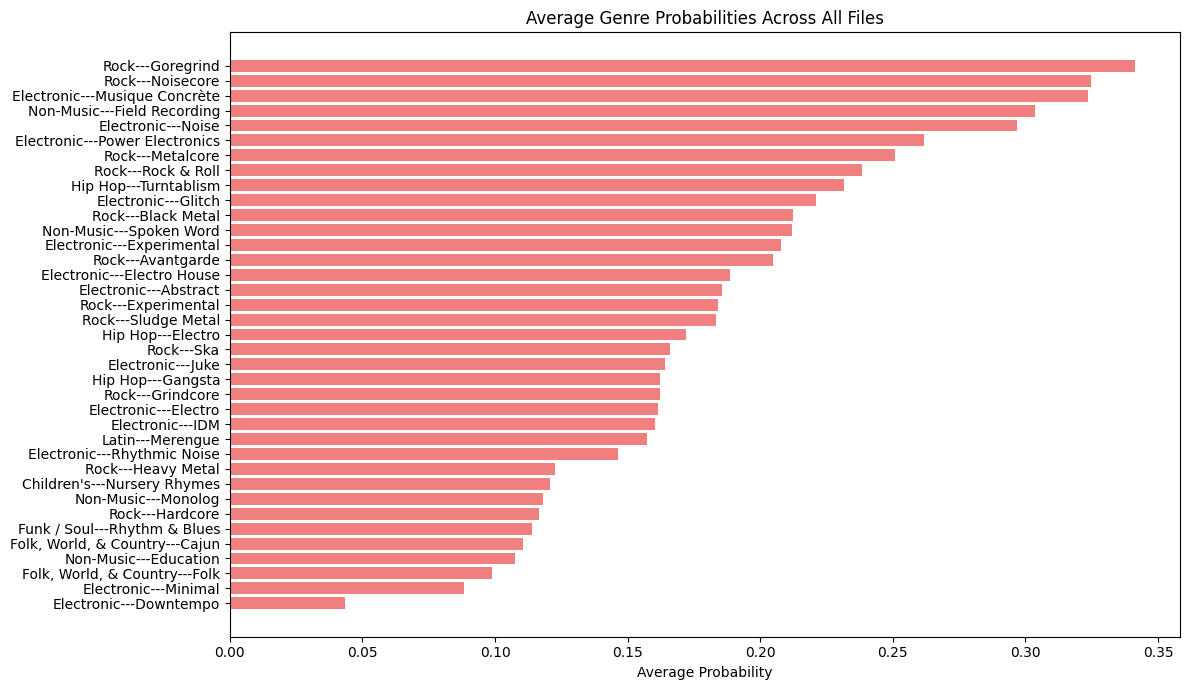

In [5]:
import json
import glob
from collections import defaultdict
import matplotlib.pyplot as plt
import os

# Directory containing the label files
label_dir = "../output_preprocess_rave/processed/wav_files_5h/labels"
file_pattern = os.path.join(label_dir, "*_labels.json")

# Get all matching files
label_files = glob.glob(file_pattern)

# Aggregation containers
total_genre_probs = defaultdict(float)
genre_counts = defaultdict(int)
bpms = []

# Optional: show info per file
show_per_file = False

for file_path in label_files:
    with open(file_path, "r") as f:
        data = json.load(f)
    

    top_probs = data.get("top_probs_dict", {})
    
    if show_per_file:
        print(f"\nFile: {os.path.basename(file_path)}")
        for genre, prob in sorted(top_probs.items(), key=lambda x: x[1], reverse=True):
            print(f"  {genre}: {prob:.4f}")
    
    for genre, prob in top_probs.items():
        total_genre_probs[genre] += prob
        genre_counts[genre] += 1

# Compute average probability per genre
avg_genre_probs = {genre: total_genre_probs[genre] / genre_counts[genre] for genre in total_genre_probs}
sorted_avg_genres = sorted(avg_genre_probs.items(), key=lambda x: x[1], reverse=True)

# Print average genre probabilities
print("\nAverage Genre Probabilities Across All Files:\n")
for genre, avg_prob in sorted_avg_genres:
    print(f"{genre}: {avg_prob:.4f}")

# Aggregate by main genre
main_genre_totals = defaultdict(float)
for genre, avg_prob in avg_genre_probs.items():
    main_genre = genre.split("---")[0]
    main_genre_totals[main_genre] += avg_prob

print("\nAggregated by Main Genre (Averaged):\n")
for main_genre, total_prob in sorted(main_genre_totals.items(), key=lambda x: x[1], reverse=True):
    print(f"{main_genre}: {total_prob:.4f}")

# Plot average genre probabilities
def plot_avg_genre_probs(sorted_genres):
    genres = [g for g, _ in sorted_genres]
    probs = [p for _, p in sorted_genres]

    plt.figure(figsize=(12, 7))
    plt.barh(genres[::-1], probs[::-1], color='lightcoral')
    plt.xlabel("Average Probability")
    plt.title("Average Genre Probabilities Across All Files")
    plt.tight_layout()
    plt.show()


# Show plots
plot_avg_genre_probs(sorted_avg_genres)


## Task 3: Compute global style distributions across the dataset, using the full 400-style tensor per file

### Calculate median and mean style probabilities


Top 20 Styles by Median Probability:

Electronic---Abstract: median=0.1565, active_in=108 files
Electronic---Experimental: median=0.1530, active_in=203 files
Electronic---Glitch: median=0.1502, active_in=229 files
Non-Music---Spoken Word: median=0.1323, active_in=78 files
Electronic---Noise: median=0.1266, active_in=160 files
Rock---Experimental: median=0.1069, active_in=7 files
Rock---Avantgarde: median=0.1040, active_in=17 files
Electronic---Electro: median=0.0957, active_in=11 files
Rock---Sludge Metal: median=0.0952, active_in=34 files
Electronic---Power Electronics: median=0.0913, active_in=28 files
Rock---Noisecore: median=0.0877, active_in=46 files
Rock---Black Metal: median=0.0817, active_in=29 files
Electronic---Ambient: median=0.0806, active_in=1 files
Rock---Hardcore: median=0.0801, active_in=3 files
Electronic---IDM: median=0.0793, active_in=5 files
Electronic---Electro House: median=0.0756, active_in=16 files
Rock---Metalcore: median=0.0726, active_in=24 files
Rock---Gore

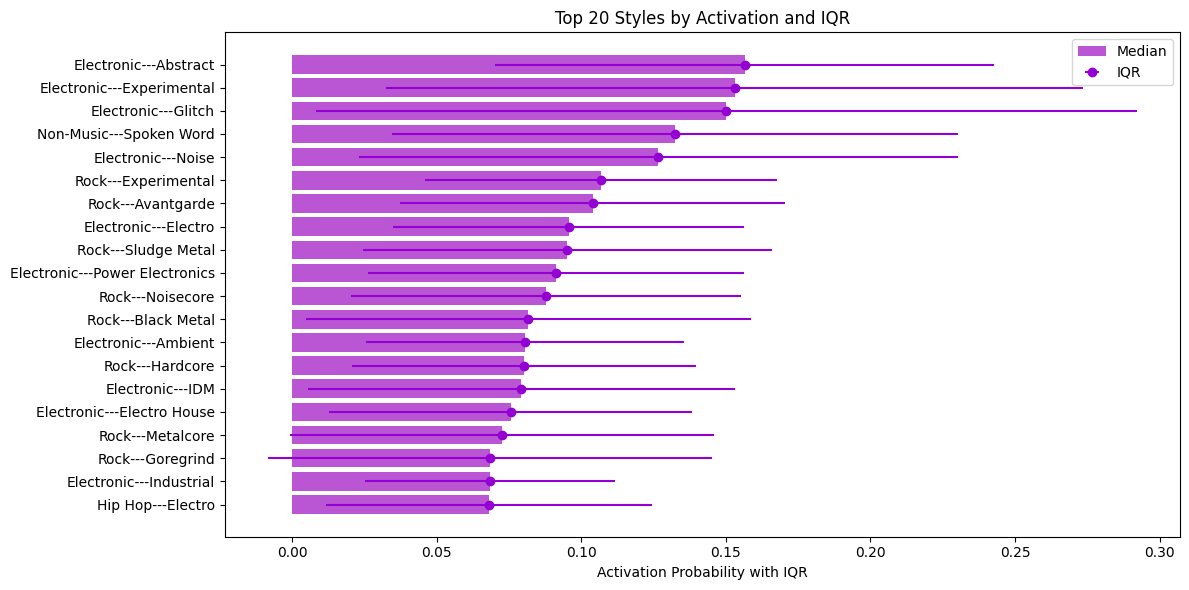

In [ ]:
import torch
import json
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

# Load style names
with open("../wav_files_5h/all_labels_master.json", "r") as f:
    style_names = json.load(f)  # should be a list of 400 names

# Get all *_style_probs.pt files
style_prob_files = glob.glob("../wav_files_5h/style_probs/*_style_probs.pt")
# Initialize storage
all_style_probs = []

for file_path in style_prob_files:
    tensor = torch.load(file_path)  # shape: [400]
    # print(f"Shape style tensor: {tensor.shape}")  # will print torch.Size([400])
    all_style_probs.append(tensor.numpy())


all_style_probs = np.array(all_style_probs)  # shape: (num_files, 400)

# Compute IQR for each style
q1 = np.percentile(all_style_probs, 25, axis=0)
q3 = np.percentile(all_style_probs, 75, axis=0)
iqr = q3 - q1

# Compute statistics
mean_probs = np.mean(all_style_probs, axis=0)
median_probs = np.median(all_style_probs, axis=0)
max_probs = np.max(all_style_probs, axis=0)
min_probs = np.min(all_style_probs, axis=0)
active_counts = np.sum(all_style_probs > 0.25, axis=0)  # files where style is 'active'

# Sort styles by median activation
sorted_indices = np.argsort(median_probs)[::-1]

print("\nTop 20 Styles by Median Probability:\n")
for idx in sorted_indices[:20]:
    print(f"{style_names[idx]}: median={median_probs[idx]:.4f}, active_in={active_counts[idx]} files")

# Plot: Top 20 median activations
def plot_top_styles_with_iqr(median_probs, iqr, style_names, sorted_indices, top_n=20):
    top_styles = [style_names[i] for i in sorted_indices[:top_n]]
    top_medians = median_probs[sorted_indices[:top_n]]
    top_iqrs = iqr[sorted_indices[:top_n]]

    plt.figure(figsize=(12, 6))
    plt.barh(top_styles[::-1], top_medians[::-1], color='mediumorchid', label='Median')
    plt.errorbar(top_medians[::-1], range(top_n), xerr=top_iqrs[::-1], fmt='o', color='darkviolet', label='IQR')
    plt.xlabel("Activation Probability with IQR")
    plt.title(f"Top {top_n} Styles by Activation and IQR")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_top_styles_with_iqr(median_probs, iqr, style_names, sorted_indices, top_n=20)


In [ ]:
import numpy as np

# all_style_probs shape: (num_files, 400)

# Threshold to count styles that appear with meaningful confidence
threshold = 0.25
active_counts = np.sum(all_style_probs > threshold, axis=0)

# Mean activation probabilities per style
mean_probs = np.mean(all_style_probs, axis=0)

# Styles with meaningful presence (active in at least, say, 5% of files)
min_active_files = int(0.05 * all_style_probs.shape[0])
active_styles_idx = np.where(active_counts >= min_active_files)[0]

print("Styles with significant presence (active in >=5% of files):")
for idx in active_styles_idx:
    print(f"{style_names[idx]} - mean prob: {mean_probs[idx]:.3f}, active in {active_counts[idx]} files")

Styles with significant presence (active in >=5% of files):
Electronic---Abstract - mean prob: 0.161, active in 108 files
Electronic---Experimental - mean prob: 0.167, active in 203 files
Electronic---Glitch - mean prob: 0.166, active in 229 files
Electronic---Noise - mean prob: 0.157, active in 160 files
Non-Music---Spoken Word - mean prob: 0.139, active in 78 files


### Apply PCA for dimensionality reduction and visualization

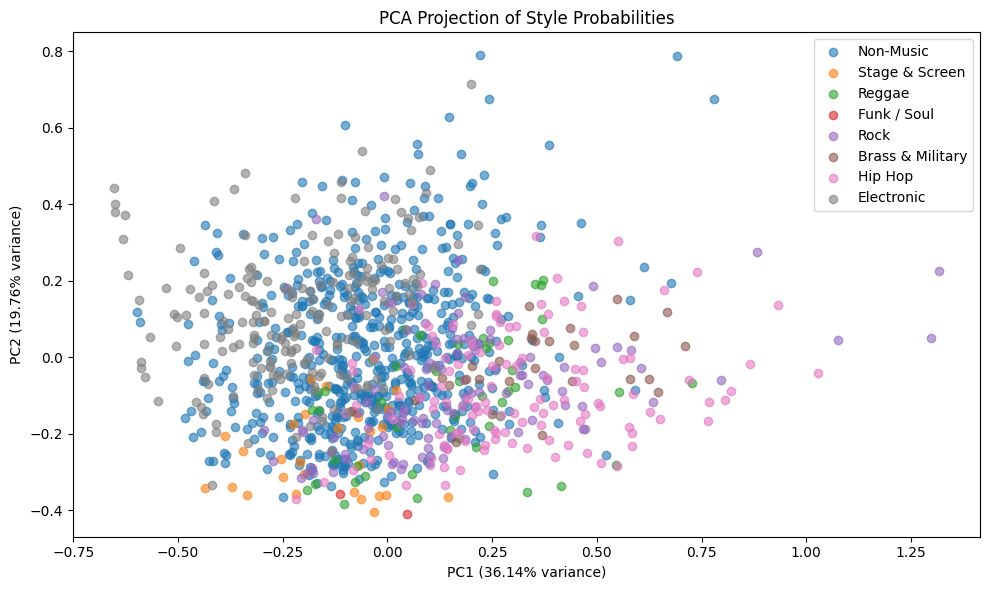

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# all_style_probs: shape (num_files, 400)
pca = PCA(n_components=2)
proj = pca.fit_transform(all_style_probs)
parent_genres = ["Electronic", "Rock", "Hip Hop","Funk / Soul","Non-Music","Reggae","Stage & Screen","Brass & Military"]

predicted_genres = []
style_prob_files = glob.glob("../wav_files_5h/style_probs/*_style_probs.pt")

for file_path in style_prob_files:
    style_probs = torch.load(file_path).numpy()
    
    genre_scores = {}
    for genre in parent_genres:
        genre_indices = [i for i, style in enumerate(style_names) if style.startswith(f"{genre}---")]
        if genre_indices:
            genre_scores[genre] = np.mean(style_probs[genre_indices])
        else:
            genre_scores[genre] = 0.0
    
    best_genre = max(genre_scores, key=genre_scores.get) if max(genre_scores.values()) > 0 else "Other"
    predicted_genres.append(best_genre)


# Optional: color by classified parent genre (you already computed this)
# colors = {"Electronic": "purple", "Rock": "orange", ...}  # define a colormap

explained_var = pca.explained_variance_ratio_ * 100  # Convert to percentages

plt.figure(figsize=(10, 6))
for genre in set(parent_genres):
    idxs = [i for i, g in enumerate(predicted_genres) if g == genre]
    plt.scatter(proj[idxs, 0], proj[idxs, 1], label=genre, alpha=0.6)

plt.title("PCA Projection of Style Probabilities")
plt.xlabel(f"PC1 ({explained_var[0]:.2f}% variance)")
plt.ylabel(f"PC2 ({explained_var[1]:.2f}% variance)")
plt.legend()
plt.tight_layout()
plt.show()
